# Exploratory Data Analysis (EDA). Retail Industry
## Average Sales by Segment, Year, and Month


In [16]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Loading the dataset

In [2]:
# Loads the dataset
dataframe_retail = pd.read_csv('data/dataset.csv')

### Exploratory Analysis

In [3]:
# Checking for duplicated data
dataframe_retail[dataframe_retail.duplicated()]

,OrderId,OrderDate,CustomerId,Segment,Country,City,State,ProductId,Category,SubCategory,TotalOrderValue


In [4]:
# Checking for missing values
dataframe_retail.isnull().sum()

OrderId            0
OrderDate          0
CustomerId         0
Segment            0
Country            0
City               0
State              0
ProductId          0
Category           0
SubCategory        0
TotalOrderValue    0
dtype: int64

In [5]:
dataframe_retail.head()

,OrderId,OrderDate,CustomerId,Segment,Country,City,State,ProductId,Category,SubCategory,TotalOrderValue
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


### Determine the total sales for each category and subcategory, considering only the top 12 subcategories, and visualize the results using a single chart.



In [6]:
dataframe_retail['OrderDate'] = pd.to_datetime(dataframe_retail['OrderDate'],format='%d/%m/%Y')

In [7]:
dataframe_retail['Month'] = dataframe_retail['OrderDate'].dt.month
dataframe_retail['Year'] = dataframe_retail['OrderDate'].dt.year

In [8]:
dataframe_retail.head()

,OrderId,OrderDate,CustomerId,Segment,Country,City,State,ProductId,Category,SubCategory,TotalOrderValue,Month,Year
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,11,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,11,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,6,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,10,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,10,2016


In [9]:
# Replace infinite values with NaN
dataframe_retail.replace([np.inf, -np.inf], np.nan, inplace=True)
# Optionally drop rows with NaN values
dataframe_retail.dropna(inplace=True)

In [10]:
dataframe_retail_grouped = dataframe_retail.groupby(['Year','Month','Segment'])['TotalOrderValue'].agg(['sum', 'mean','median'])

In [11]:
dataframe_retail_grouped

sum        mean  median
Year Month Segment                                    
2015 1     Consumer      6896.6290  146.736787  36.440
           Corporate     1701.5280  130.886769  51.940
           Home Office   5607.5500  329.855882  62.820
     2     Consumer      3167.8540  117.327926  22.776
           Corporate      623.1180   69.235333  62.310
...                            ...         ...     ...
2018 11    Corporate    44357.9862  341.215278  79.530
           Home Office  24009.3840  247.519423  56.560
     12    Consumer     48107.4558  183.616244  52.533
           Corporate    20524.4320  153.167403  46.460
           Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [12]:
# Extract the levels
years = dataframe_retail_grouped.index.get_level_values(0)
months = dataframe_retail_grouped.index.get_level_values(1)
segments = dataframe_retail_grouped.index.get_level_values(2)

In [13]:
# Ensure months are treated as numerical values for proper plotting
dataframe_retail_grouped = dataframe_retail_grouped.reset_index()
# Replace infinite values with NaN
dataframe_retail_grouped.replace([np.inf, -np.inf], np.nan, inplace=True)
# Optionally drop rows with NaN values
dataframe_retail_grouped.dropna(inplace=True)

In [17]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

<Figure size 1200x600 with 0 Axes>

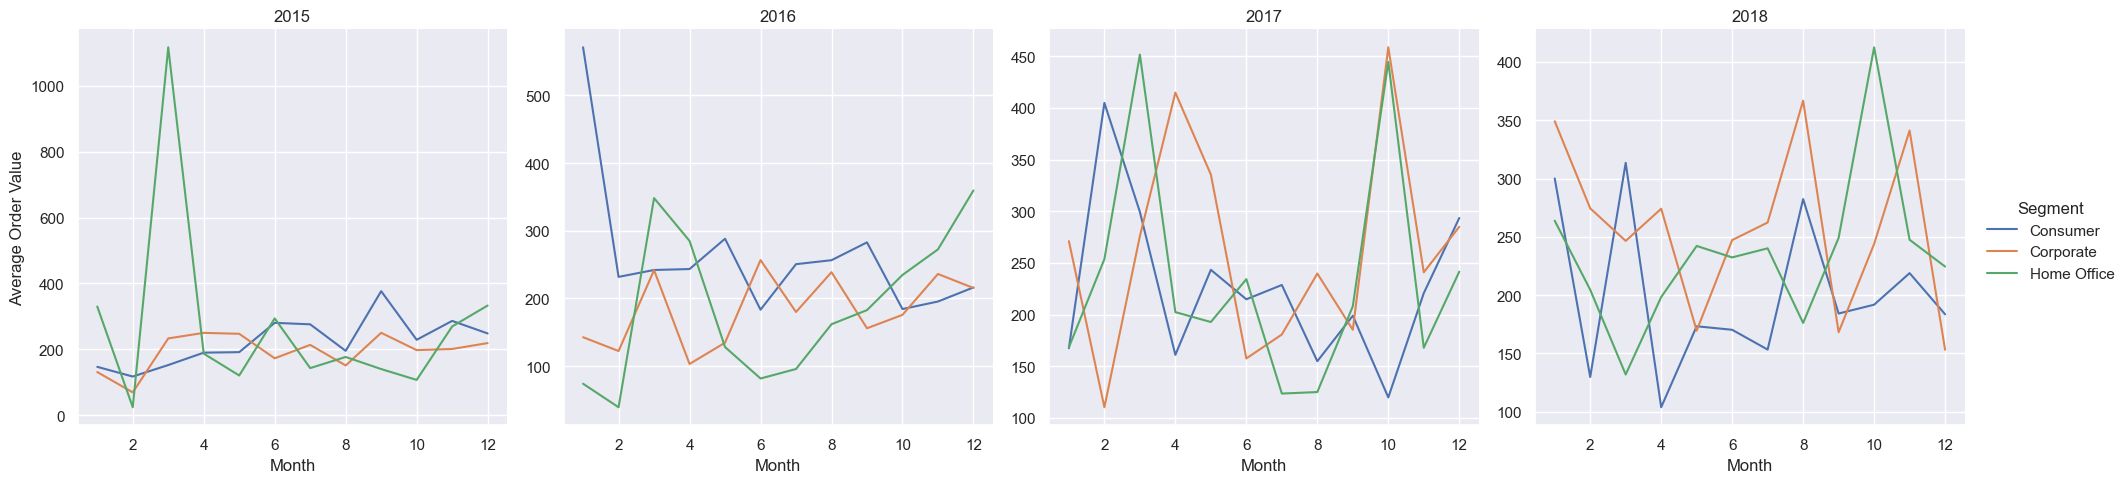

In [18]:
# Plot graph
plt.figure(figsize = (12,6))
sns.set()
figure1 = sns.relplot(
    kind='line',
    data=dataframe_retail_grouped,
    x='Month',
    y='mean',
    hue='Segment',
    col='Year',
    col_wrap=4,
    facet_kws={'sharey': False, 'sharex': True}
)

figure1.set_axis_labels("Month", "Average Order Value")
figure1.set_titles("{col_name}")

plt.show()
